# Libraries

In [51]:
!pip install fitdecode matplotlib pandas

In [52]:
import fitdecode
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Loading the Data

In [70]:
# Watch FIT file data
watch_filename = 'Outdoor_run.fit'
watch_time = []
watch_hr = []

# ESP32 FIT File data
esp_filename = 'ESP32_Test_1.fit'
esp_time = []
esp_hr = []

# Parsing the watch data
with fitdecode.FitReader(watch_filename) as fit:
  for frame in fit:
    if frame.frame_type == fitdecode.FIT_FRAME_DATA and frame.name == 'record':
      values = {f.name: f.value for f in frame.fields}
      if 'heart_rate' in values and 'timestamp' in values:
        watch_time.append(values['timestamp'])
        watch_hr.append(values['heart_rate'])

# Clearing the None values which were present in the data
i = 0
while i < len(watch_time):
  if watch_hr[i] == None:
    watch_time.pop(i)
    watch_hr.pop(i)
  else:
    i += 1

watch_df = pd.DataFrame({"timestamp": watch_time, "heart_rate": watch_hr})

# Drop rows where HR is None
watch_df = watch_df.dropna(subset=["heart_rate"])

# Ensure timestamp is proper datetime64[ns, UTC]
watch_df["timestamp"] = pd.to_datetime(watch_df["timestamp"], utc=True)

# Set as index and sort
watch_df = watch_df.set_index("timestamp").sort_index()
watch_df.index = watch_df.index.tz_convert("Europe/Belgrade").tz_localize(None)

# Parsing the ESP data
with fitdecode.FitReader(esp_filename) as fit:
  for frame in fit:
    if frame.frame_type == fitdecode.FIT_FRAME_DATA and frame.name == 'record':
      values = {f.name: f.value for f in frame.fields}
      if 'heart_rate' in values and 'timestamp' in values:
        esp_time.append(values['timestamp'])
        esp_hr.append(values['heart_rate'])

# Clearing the None values which were present in the data
i = 0
while i < len(esp_time):
  if esp_hr[i] == None:
    esp_time.pop(i)
    esp_hr.pop(i)
  else:
    i += 1

esp_df = pd.DataFrame({"timestamp": esp_time, "heart_rate": esp_hr})

# Drop rows where HR is None
esp_df = esp_df.dropna(subset=["heart_rate"])

# Ensure timestamp is proper datetime64[ns, UTC]
esp_df["timestamp"] = pd.to_datetime(esp_df["timestamp"], utc=True)

# Set as index and sort
esp_df = esp_df.set_index("timestamp").sort_index()
esp_df.index = esp_df.index.tz_convert("Europe/Belgrade").tz_localize(None)

# Data Visualisation

## Watch Data Visualisation

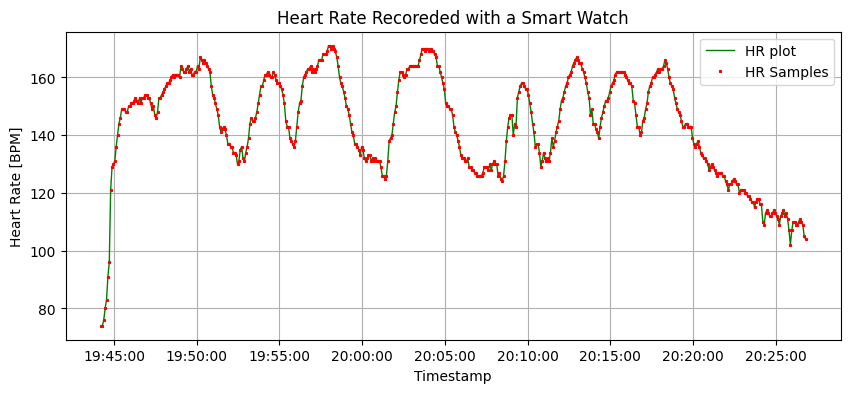

In [69]:
# Watch data plot
fig_watch, ax_watch = plt.subplots(figsize=(10,4))
ax_watch.plot(watch_df.index, watch_df['heart_rate'], linewidth = 1, color = 'green', label = 'HR plot')
ax_watch.plot(watch_df.index, watch_df['heart_rate'], '*', markersize = 2, color = 'red', label = 'HR Samples')
ax_watch.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
ax_watch.set(xlabel = 'Timestamp', ylabel = 'Heart Rate [BPM]', title = 'Heart Rate Recoreded with a Smart Watch')
ax_watch.legend()
ax_watch.grid(which='both')

## ESP Data Visualisation

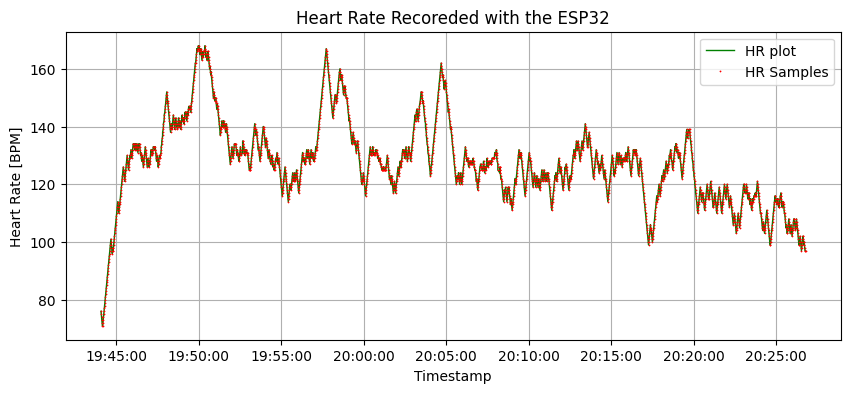

In [78]:
# ESP data plot
fig_esp, ax_esp = plt.subplots(figsize=(10,4))
ax_esp.plot(esp_df.index, esp_df['heart_rate'], linewidth = 1, color = 'green', label = 'HR plot')
ax_esp.plot(esp_df.index, esp_df['heart_rate'], '*', markersize = 0.7, color = 'red', label = 'HR Samples')
ax_esp.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
ax_esp.set(xlabel = 'Timestamp', ylabel = 'Heart Rate [BPM]', title = 'Heart Rate Recoreded with the ESP32')
ax_esp.legend()
ax_esp.grid(which='both')

# Data Comparisson

## Whole Run

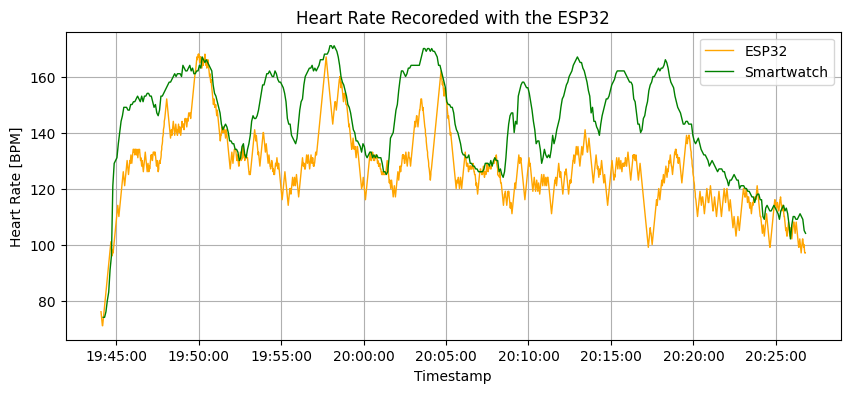

In [79]:
# Comparing the full range
fig_fr, ax_fr = plt.subplots(figsize=(10,4))
ax_fr.plot(esp_df.index, esp_df['heart_rate'], linewidth = 1, color = 'orange', label = 'ESP32')
ax_fr.plot(watch_df.index, watch_df['heart_rate'], linewidth = 1, color = 'green', label = 'Smartwatch')
ax_fr.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
ax_fr.set(xlabel = 'Timestamp', ylabel = 'Heart Rate [BPM]', title = 'Heart Rate Recoreded with the ESP32')
ax_fr.legend()
ax_fr.grid(which='both')

## Segment Analysis

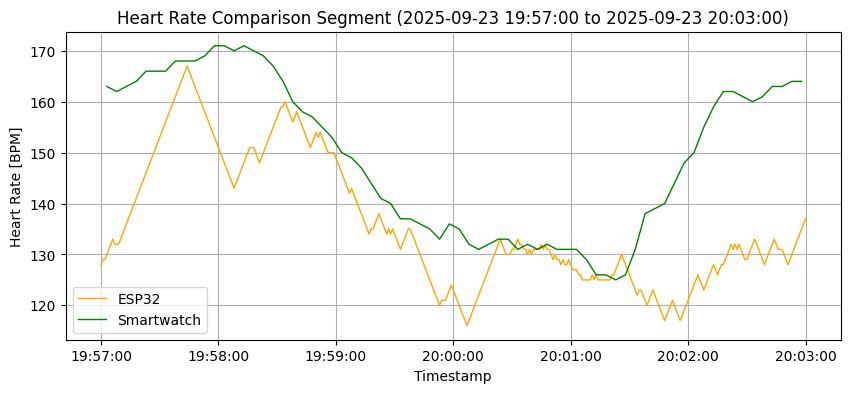

In [88]:
# Enter the start and end times for the segment analysis
start_time_str = '2025-09-23 19:57:00'  # Example: YYYY-MM-DD HH:MM:SS
end_time_str = '2025-09-23 20:03:00'    # Example: YYYY-MM-DD HH:MM:SS

# Convert the input strings to datetime objects
start_time = pd.to_datetime(start_time_str)
end_time = pd.to_datetime(end_time_str)

# Filter the dataframes based on the specified time range
esp_segment_df = esp_df.loc[(esp_df.index >= start_time) & (esp_df.index <= end_time)]
watch_segment_df = watch_df.loc[(watch_df.index >= start_time) & (watch_df.index <= end_time)]

# Plotting the segment
fig_segment, ax_segment = plt.subplots(figsize=(10,4))
ax_segment.plot(esp_segment_df.index, esp_segment_df['heart_rate'], linewidth = 1, color = 'orange', label = 'ESP32')
ax_segment.plot(watch_segment_df.index, watch_segment_df['heart_rate'], linewidth = 1, color = 'green', label = 'Smartwatch')
ax_segment.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
ax_segment.set(xlabel = 'Timestamp', ylabel = 'Heart Rate [BPM]', title = f'Heart Rate Comparison Segment ({start_time_str} to {end_time_str})')
ax_segment.legend()
ax_segment.grid(which='both')